# Final Project

### <span style="color:gray"> Violet Davis and Annie Friar </span>

###
`Data Exploration`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---

In [ ]:
# Import libraries

# standard
import pandas as pd
import numpy as np
import random
import os

# tf and keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers

# plots and images
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

#silence TF
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

random.seed(2)
%matplotlib inline

# FILL IN CODE HERE #
NORMAL_IMAGE_PATH = '/content/drive/MyDrive/207_final_project/Final_Project_Data/normal/' # Class as 1
GLIOMA_IMAGE_PATH = '/content/drive/MyDrive/207_final_project/Final_Project_Data/glioma_tumor/' # Class as 2
MENINGIOMA_IMAGE_PATH = '/content/drive/MyDrive/207_final_project/Final_Project_Data/meningioma_tumor/' # Class as 3
PITUITARY_IMAGE_PATH = '/content/drive/MyDrive/207_final_project/Final_Project_Data/pituitary_tumor/' # Class as 4

## Dataset


Sample of normal images in data:


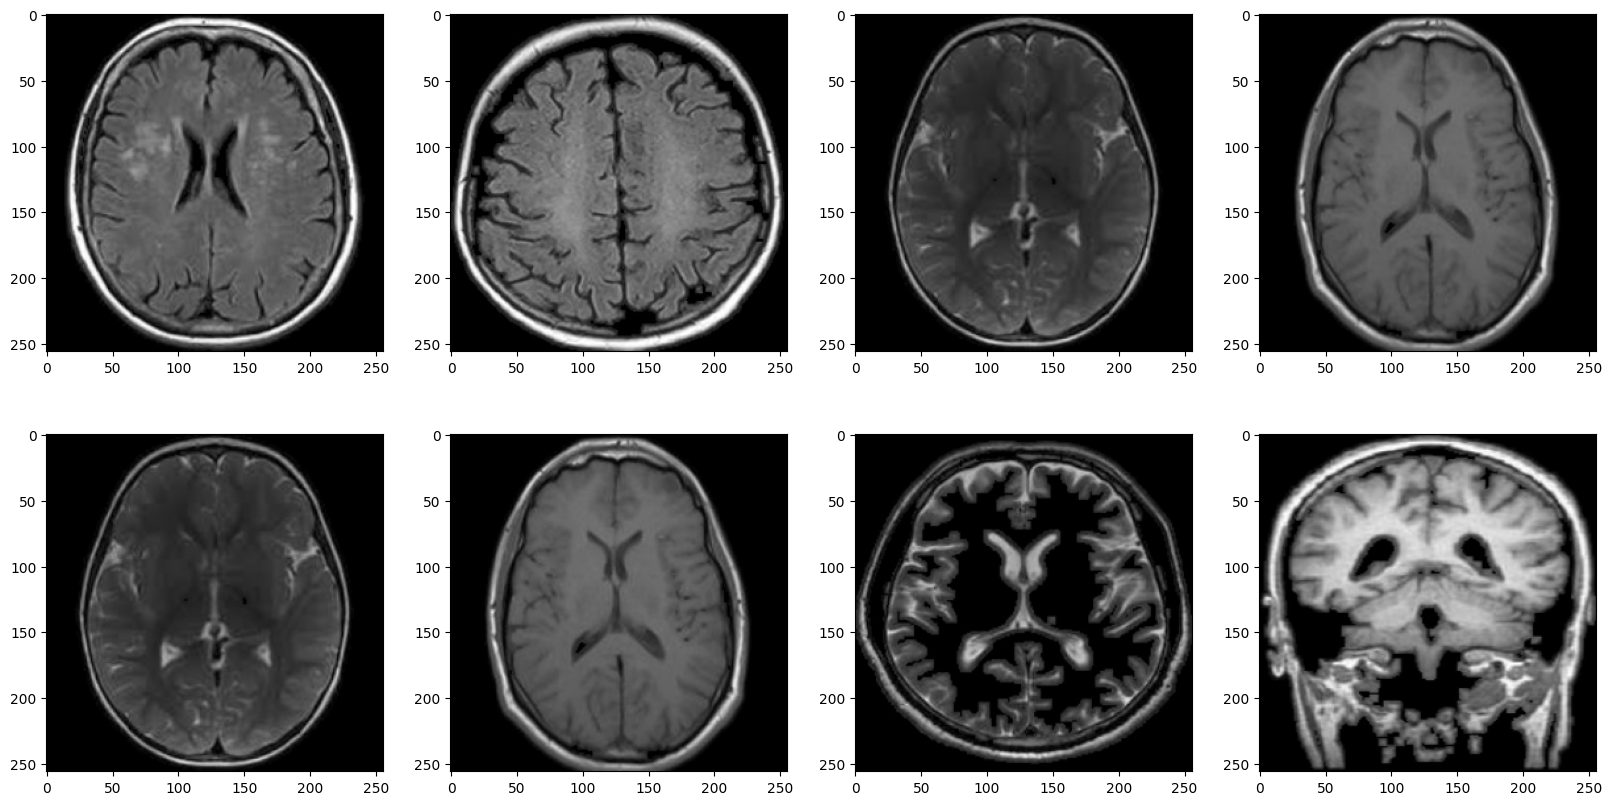

In [ ]:
# read image
indx=0
images = []
labels = []

labels_index = 0

print('Sample of normal images in data:')
for idx, img in enumerate(os.listdir(NORMAL_IMAGE_PATH)):
    img = load_img(
    NORMAL_IMAGE_PATH + img)
    images.append(img)
    labels.append((idx, 1))
    labels_index = idx

normal_index = labels_index + 1

for idx, img in enumerate(os.listdir(GLIOMA_IMAGE_PATH)):
    img = load_img(
    GLIOMA_IMAGE_PATH + img)
    images.append(img)
    labels.append((idx+normal_index, 2))
    labels_index = idx

glioma_index = normal_index + labels_index + 1

for idx, img in enumerate(os.listdir(MENINGIOMA_IMAGE_PATH)):
    img = load_img(
    MENINGIOMA_IMAGE_PATH + img)
    images.append(img)
    labels.append((idx+glioma_index, 3))
    labels_index = idx

meningioma_index = glioma_index + labels_index + 1

for idx, img in enumerate(os.listdir(PITUITARY_IMAGE_PATH)):
    img = load_img(
    PITUITARY_IMAGE_PATH + img)
    images.append(img)
    labels.append((idx+meningioma_index, 4))

nrows, ncols = 2,4 #print first 8 images
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))
for i in range(nrows):
    for j in range(ncols):
        indx = i*nrows+j
        axs[i,j].imshow(images[indx])

Sample of abnormal images in data:


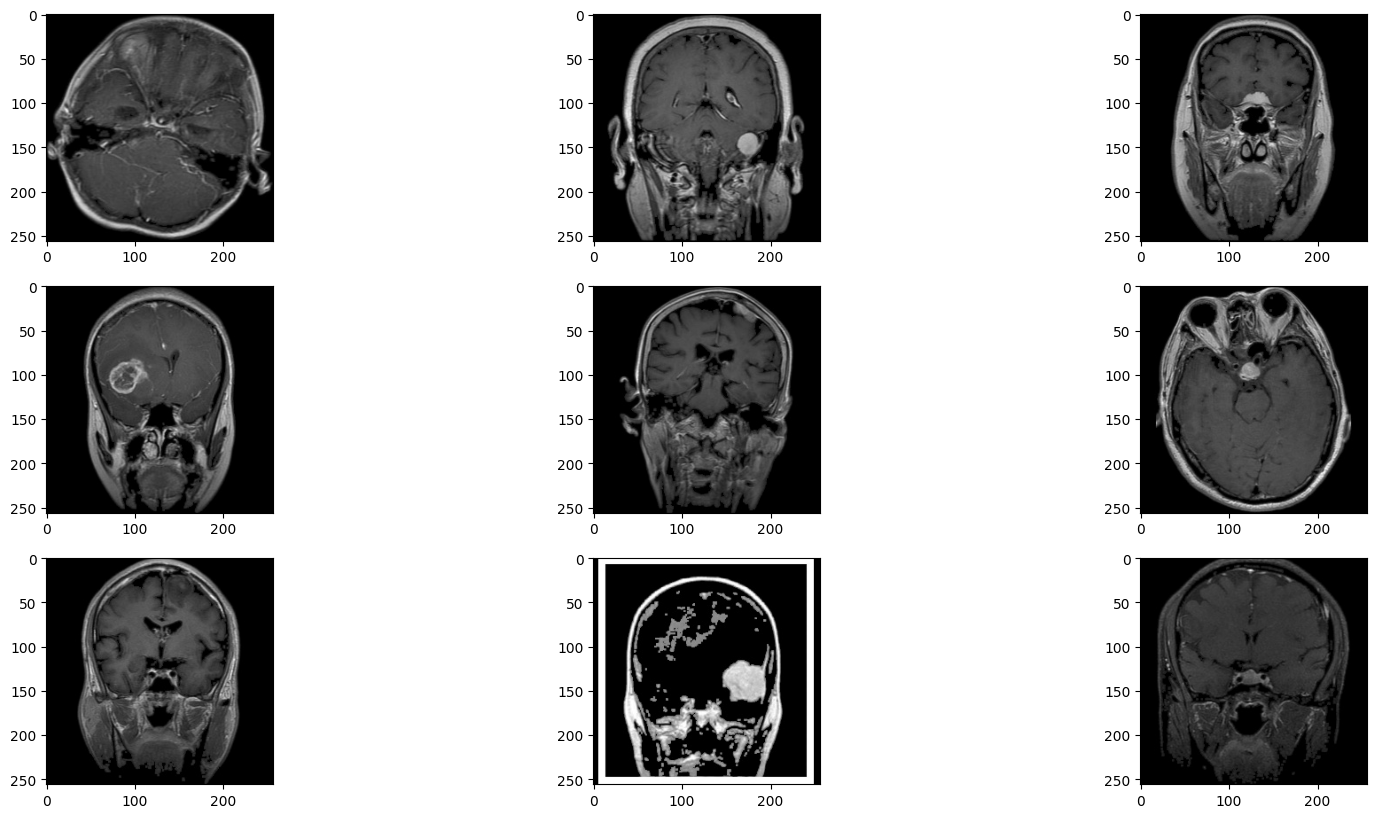

In [ ]:
print('Sample of abnormal images in data:')

nrows, ncols = 3,3 #print 9 abnormal images
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))

for i in range(nrows):
    for j in range(ncols):
        #glioma
        if j == 0:
            indx = i+normal_index+2
            axs[i,j].imshow(images[indx])

        #meningioma
        if j == 1:
            indx = i+glioma_index+2
            axs[i,j].imshow(images[indx])

        #pituitary
        if j == 2:
            indx = i+meningioma_index+2
            axs[i,j].imshow(images[indx])

Sample of glioma images in data:
439
441
440
443


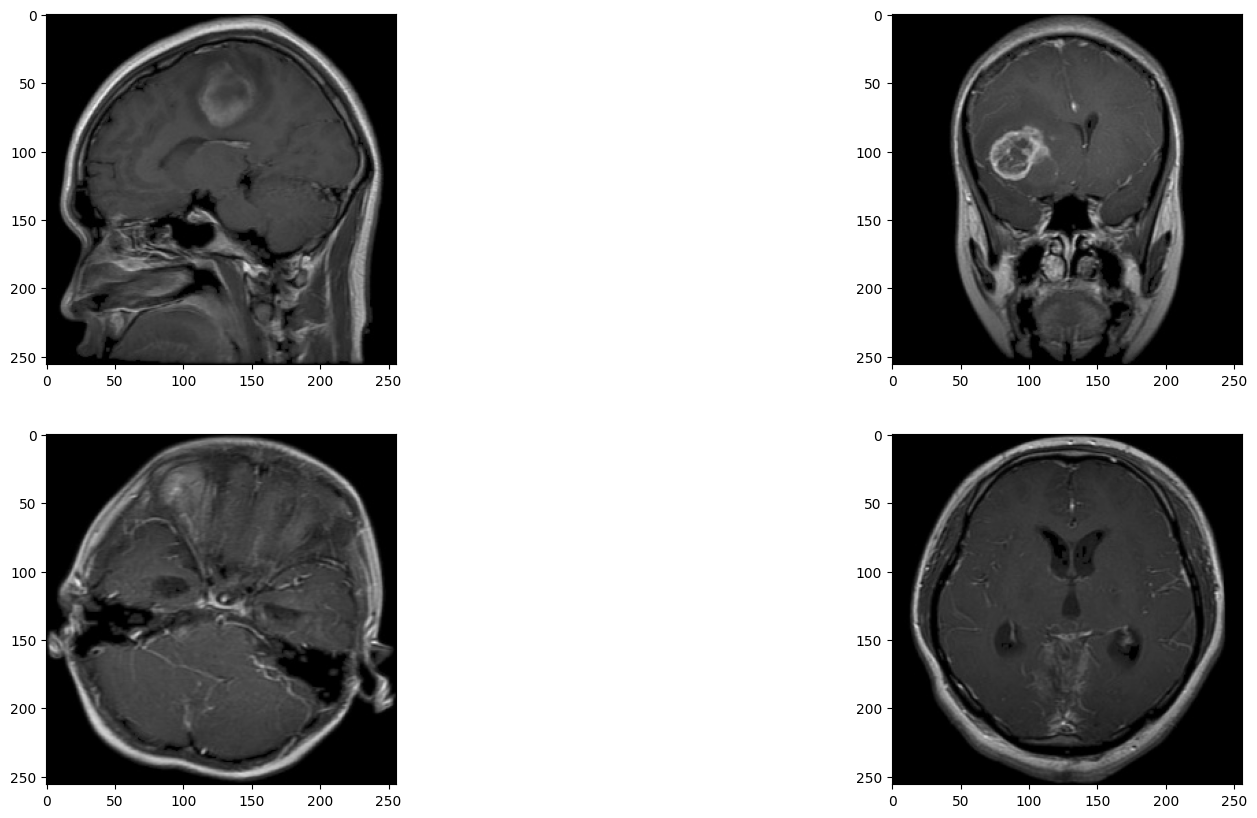

In [ ]:
print('Sample of glioma images in data:')

nrows, ncols = 2,2 #print 9 abnormal images
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))

for i in range(nrows):
    for j in range(ncols):
        #glioma
        indx = ((j+1)*(i+1))+normal_index+j
        axs[i,j].imshow(images[indx])
        print(indx)

Sample of meningioma images in data:
1340
1342
1341
1344


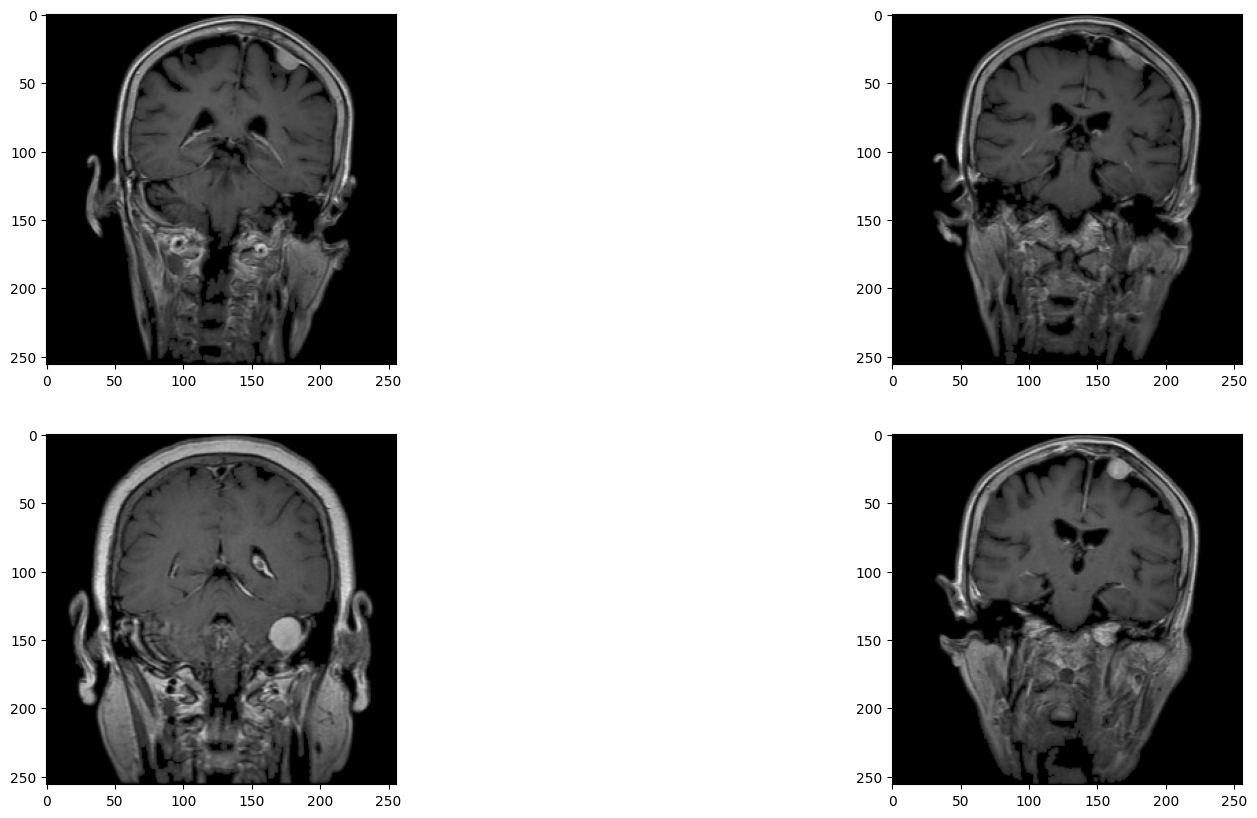

In [ ]:
print('Sample of meningioma images in data:')

nrows, ncols = 2,2 #print 9 abnormal images
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))

for i in range(nrows):
    for j in range(ncols):
        #glioma
        indx = ((j+1)*(i+1))+glioma_index+j
        axs[i,j].imshow(images[indx])
        print(indx)

Sample of pituitary images in data:
2263
2265
2264
2267


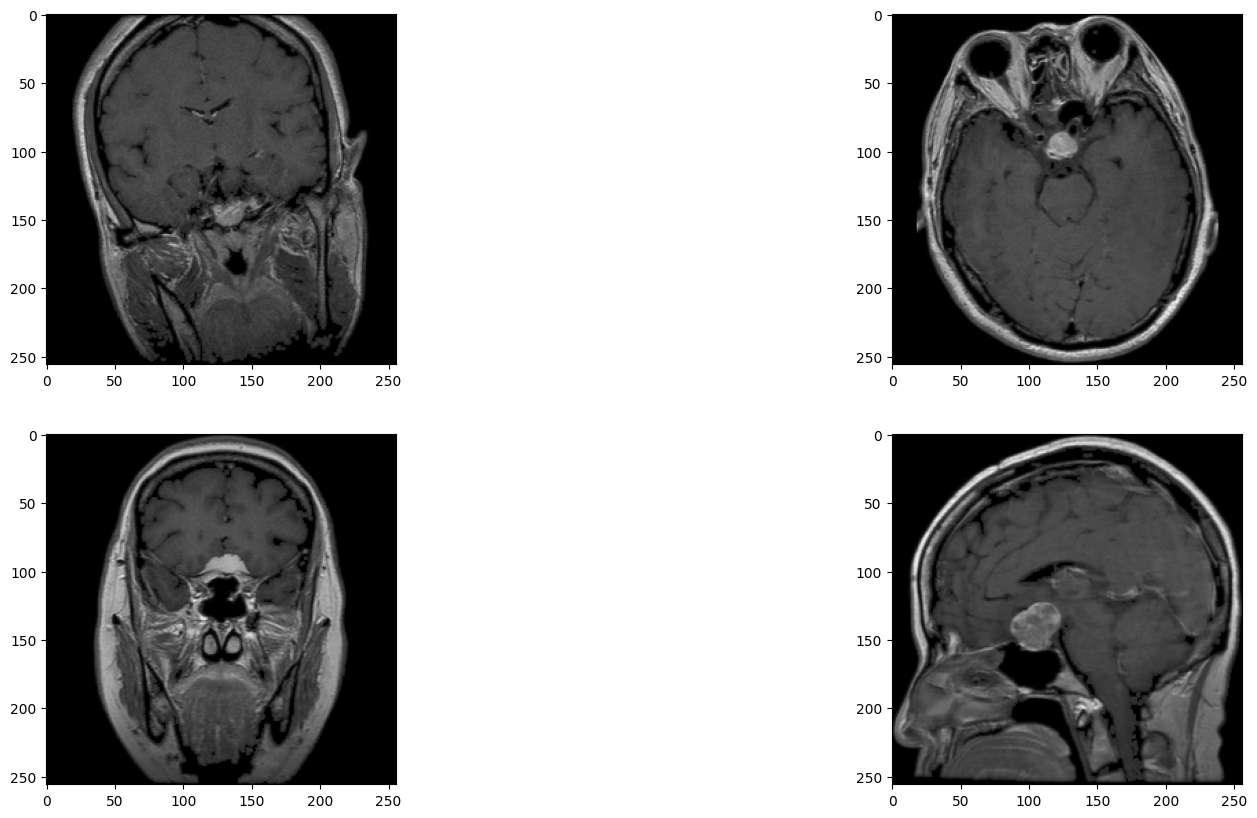

In [ ]:
print('Sample of pituitary images in data:')

nrows, ncols = 2,2 #print 9 abnormal images
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))

for i in range(nrows):
    for j in range(ncols):
        #glioma
        indx = ((j+1)*(i+1))+meningioma_index+j
        axs[i,j].imshow(images[indx])
        print(indx)

---

In [ ]:
type(images[0])

PIL.JpegImagePlugin.JpegImageFile

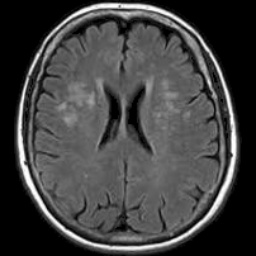

In [ ]:
images[0]

In [ ]:
labels = np.array(labels)

In [ ]:
labels_df = pd.DataFrame(labels,
                   columns=['img_num', 'Label'])

In [ ]:
labels_df['Label'].value_counts()

3    923
2    901
4    844
1    438
Name: Label, dtype: int64

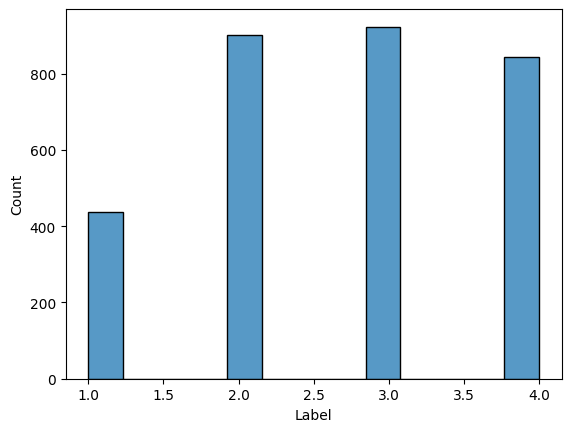

In [ ]:
# histogram
sns.histplot(
    data=labels_df,
    stat="count",
    x = "Label"
);

## From Cornelia's Diabetic Retinopathy Notebook:

As you can see from the histogram above, our dataset is very imbalanced, which is common in healthcare, and it happens because some diseases are rare. The presence of imbalanced data hampers the detection of rare events as most classification methods implicitly assume a similar occurrence of classes and are designed to maximize the overall classification accuracy.

We will correct for class imbalance in two ways:

  * First, we will binarize the DR diagnosis as follows:
     - 'no refer' are {No DR, mild}
     - 'refer' are {Moderate, Severe, Proliferate}


  * Second, we'll only take 80 random samples from the 'no refer' class and 80 from the 'refer' class.

It is a crude method to deal with imbalanced data, but it will be good enough for starters.

`Correct for data imbalance`

In [ ]:
np.random.seed(1234)

n_size = 438

normal = labels_df[labels_df['Label'] == 1]
glioma = labels_df[labels_df['Label'] == 2]
meningioma = labels_df[labels_df['Label'] == 3]
pituitary = labels_df[labels_df['Label'] == 4]

# randomly draw 400 images from each classes
temp_normal = list(np.random.choice(
    normal.img_num,
    size=n_size,
    replace=False
))

temp_glioma = list(np.random.choice(
    glioma.img_num,
    size=n_size,
    replace=False
))

temp_meningioma = list(np.random.choice(
    meningioma.img_num,
    size=n_size,
    replace=False
))


temp_pituitary = list(np.random.choice(
    pituitary.img_num,
    size=n_size,
    replace=False
))

In [ ]:
image_list = []
labels_list = []

for num in temp_normal:
    image_list.append(images[num])
    labels_list.append(labels[num])

for num in temp_glioma:
    image_list.append(images[num])
    labels_list.append(labels[num])

for num in temp_meningioma:
    image_list.append(images[num])
    labels_list.append(labels[num])

for num in temp_pituitary:
    image_list.append(images[num])
    labels_list.append(labels[num])

In [ ]:
print("Length of Image List: ", len(image_list))
print("Length of Labels List: ", len(labels_list))

Length of Image List:  1752
Length of Labels List:  1752


In [ ]:
images_mini = []
y_mini = []

for img in image_list:

# transform image to array
    img = img_to_array(img)

    # append to images
    images_mini.append(img)

images_mini = np.stack(images_mini)

for label in labels_list:
    y_mini.append(label[1])

y_mini = np.array(y_mini)

In [ ]:
images_mini.shape

(1752, 256, 256, 3)

In [ ]:
def preprocess_data_part2(images, y, split=(0.6,0.2,0.2)):
    """ Split data into train, validation and test sets; apply transformaions and augmentations

    Params:
    -------
    images  (np.ndarray): Images of shape (N, 224, 224, 3)
    y (np.ndarray): Labels of shape (N,)
    split (tuple): 3 values summing to 1 defining split of train, validation and test sets

    Returns:
    --------
    X_train (np.ndarray): Train images of shape (N_train, 224, 224, 3)
    y_train (np.ndarray): Train labels of shape (N_train,)
    X_val (np.ndarray): Val images of shape (N_val, 224, 224, 3)
    y_val (np.ndarray): Val labels of shape (N_val,)
    X_test (np.ndarray): Test images of shape (N_test, 224, 224, 3)
    y_test (np.ndarray): Test labels of shape (N_test,)

    """

    ### create train/validation/test sets ###
    #########################################
    # NOTE: Each time you run this cell, you'll re-shuffle the data. The ordering will be the same due to the random seed generator
    tf.random.set_seed(1234)
    np.random.seed(1234)

    shuffle = np.random.permutation(np.arange(len(images)))
    images, y = images[shuffle], y[shuffle]

    splits = np.multiply(len(images_mini), split).astype(int)
    X_train, X_val, X_test = np.split(images, [splits[0], splits[0]+splits[1]])
    y_train, y_val, y_test = np.split(y, [splits[0], splits[0]+splits[1]])

    # rescale image to [0,1], i.e., greyscale
    X_train = tf.image.rgb_to_grayscale(X_train)/255.0
    X_val = tf.image.rgb_to_grayscale(X_val)/255.0
    X_test = tf.image.rgb_to_grayscale(X_test)/255.0

    return X_train, y_train, X_val, y_val, X_test, y_test

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = preprocess_data_part2(
    images_mini,
    y_mini,
    split=(0.6,0.2,0.2)
)

print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_val shape {X_val.shape}")
print(f"y_val shape {y_val.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

X_train shape (1051, 256, 256, 1)
y_train shape (1051,)
X_val shape (350, 256, 256, 1)
y_val shape (350,)
X_test shape (351, 256, 256, 1)
y_test shape (351,)


In [ ]:
validate_split = pd.DataFrame(y_train)

In [ ]:
validate_split.value_counts()

1    271
4    264
3    259
2    257
dtype: int64

## Average Images Explore

In [ ]:
norm_x_train = X_train[y_train == 1]

In [ ]:
norm_avg = np.mean(norm_x_train, axis = 0)

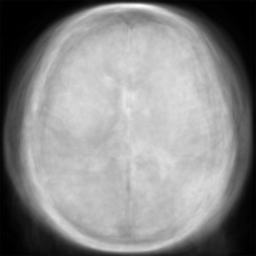

In [ ]:
array_to_img(norm_avg)

In [ ]:
abnorm_x_train = X_train[y_train != 1]

In [ ]:
abnorm_avg = np.mean(abnorm_x_train, axis = 0)

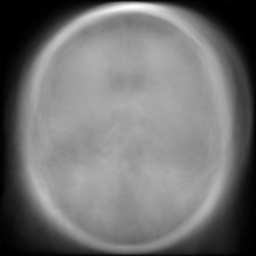

In [ ]:
array_to_img(abnorm_avg)

In [ ]:
glioma_x_train = X_train[y_train == 2]
meningioma_x_train = X_train[y_train == 3]
pituitary_x_train = X_train[y_train == 4]

In [ ]:
glioma_avg = np.mean(glioma_x_train, axis = 0)
meningioma_avg = np.mean(meningioma_x_train, axis = 0)
pituitary_avg = np.mean(pituitary_x_train, axis = 0)

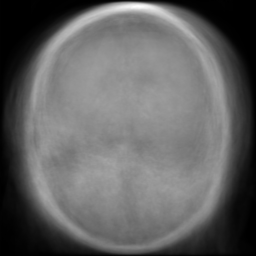

In [ ]:
array_to_img(glioma_avg)

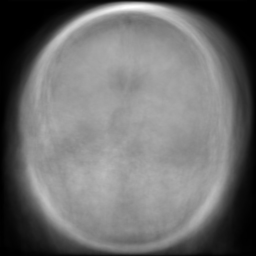

In [ ]:
array_to_img(meningioma_avg)

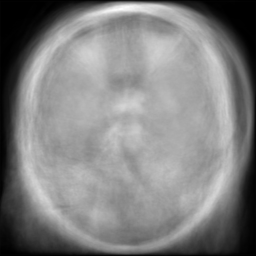

In [ ]:
array_to_img(pituitary_avg)

## KMeans

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()
import numpy as np
import pandas

from sklearn.datasets import make_blobs
from matplotlib.patches import Ellipse


from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.mixture import GaussianMixture as GMM
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering

In [ ]:
X_train.shape

TensorShape([1051, 256, 256, 1])

In [ ]:
X_flat = np.reshape(X_train, (1051, 65536))

**How Many Clusters?**
Note: This takes ~10 minutes to run :(  Image included below so it doesn't need to be run each time

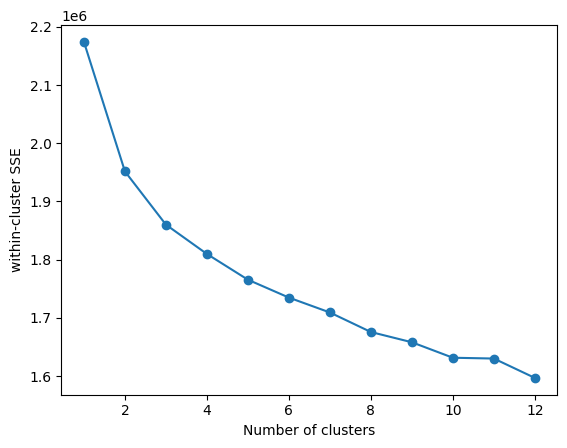

In [ ]:
#wc_SSE = []

#for i in range(1, 13):
#    km = KMeans(n_clusters=i,
#                init='k-means++',
#                n_init=10,
#                max_iter=300,
#                tol=1e-04,
#                random_state=0)
#    km.fit(X_flat)
#    wc_SSE.append(km.inertia_)

In [ ]:
#plt.plot(range(1,13), wc_SSE, marker='o');
#plt.xlabel('Number of clusters');
#plt.ylabel('within-cluster SSE');

**How Many Clusters? Count by 5**
Note: This takes ~20 minutes to run :(  Image included below so it doesn't need to be run each time

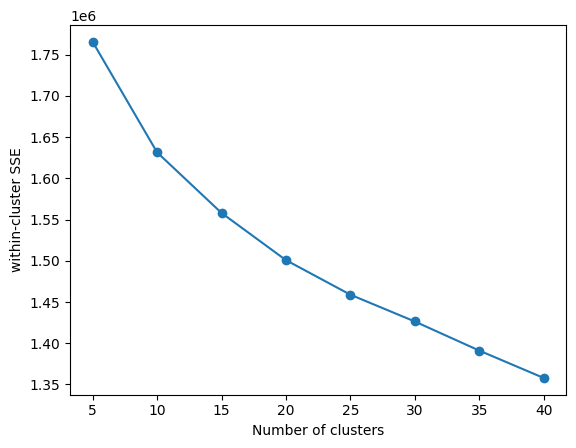

In [ ]:
#wc_SSE = []

#for i in range(5, 45, 5):
#    km = KMeans(n_clusters=i,
#                init='k-means++',
#                n_init=10,
#                max_iter=300,
#                tol=1e-04,
#                random_state=0)
#    km.fit(X_flat)
#    wc_SSE.append(km.inertia_)

In [ ]:
#plt.plot(range(5,45,5), wc_SSE, marker='o');
#plt.xlabel('Number of clusters');
#plt.ylabel('within-cluster SSE');

**How Many Clusters? 6-16**
Note: This takes ~12 minutes to run :(  Image included below so it doesn't need to be run each time

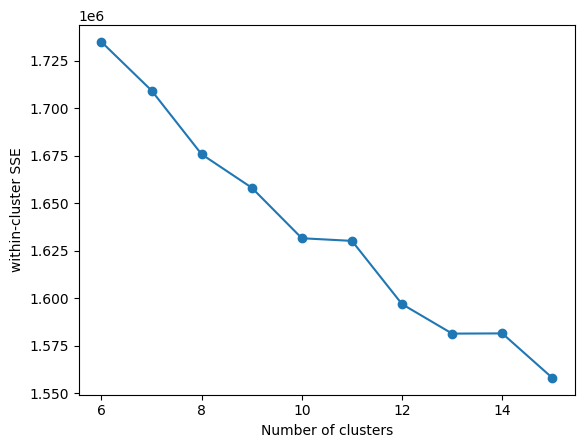

In [ ]:
#wc_SSE = []

#for i in range(6,16):
#    km = KMeans(n_clusters=i,
#                init='k-means++',
#                n_init=10,
#                max_iter=300,
#                tol=1e-04,
#                random_state=0)
#    km.fit(X_flat)
#    wc_SSE.append(km.inertia_)

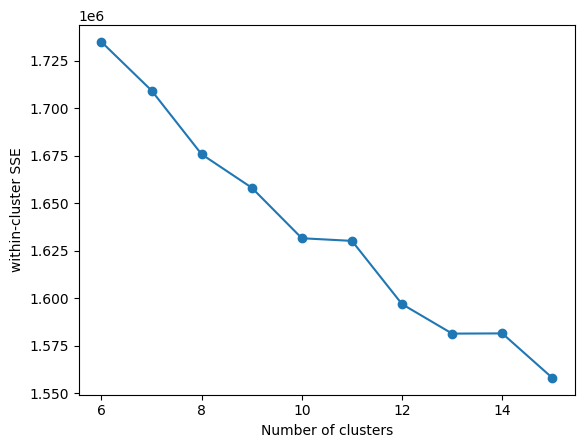

In [ ]:
#plt.plot(range(6,16), wc_SSE, marker='o');
#plt.xlabel('Number of clusters');
#plt.ylabel('within-cluster SSE');

**Settled on 10 Clusters**

In [ ]:
kmeans = KMeans(n_clusters=10,
                init='k-means++',
                n_init=10,
                max_iter=300,
                tol=1e-04,
                random_state=0)
labels = kmeans.fit(X_flat).predict(X_flat)

In [ ]:
label_0_x_train = X_train[labels == 0]
label_1_x_train = X_train[labels == 1]
label_2_x_train = X_train[labels == 2]
label_3_x_train = X_train[labels == 3]
label_4_x_train = X_train[labels == 4]
label_5_x_train = X_train[labels == 5]
label_6_x_train = X_train[labels == 6]
label_7_x_train = X_train[labels == 7]
label_8_x_train = X_train[labels == 8]
label_9_x_train = X_train[labels == 9]

In [ ]:
label_0_avg = np.mean(label_0_x_train, axis = 0)
label_1_avg = np.mean(label_1_x_train, axis = 0)
label_2_avg = np.mean(label_2_x_train, axis = 0)
label_3_avg = np.mean(label_3_x_train, axis = 0)
label_4_avg = np.mean(label_4_x_train, axis = 0)
label_5_avg = np.mean(label_5_x_train, axis = 0)
label_6_avg = np.mean(label_6_x_train, axis = 0)
label_7_avg = np.mean(label_7_x_train, axis = 0)
label_8_avg = np.mean(label_8_x_train, axis = 0)
label_9_avg = np.mean(label_9_x_train, axis = 0)

**KMeans Labels Distribution**

In [ ]:
labels_df = pd.DataFrame(labels)
labels_df.value_counts(normalize=True)

0    0.238820
2    0.185538
5    0.158896
4    0.140818
9    0.090390
8    0.087536
7    0.033302
3    0.027593
6    0.024738
1    0.012369
dtype: float64

In [ ]:
labels_df.value_counts()

0    251
2    195
5    167
4    148
9     95
8     92
7     35
3     29
6     26
1     13
dtype: int64

**Average Images, Popular Categories**

Label 0:
Number of Images:  251
Percent of Images:  23.9


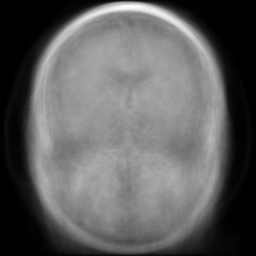

In [ ]:
print("Label 0:")
print("Number of Images: ", labels_df.value_counts()[0])
print("Percent of Images: ", round((labels_df.value_counts()[0] / len(labels_df))*100,1))
array_to_img(label_0_avg)

In [ ]:
label_0_y_train = y_train[labels == 0]
label_0_df = pd.DataFrame(label_0_y_train)
label_0_df.value_counts(sort=False)

1     40
2    110
3     69
4     32
dtype: int64

Label 2:
Number of Images:  195
Percent of Images:  18.6


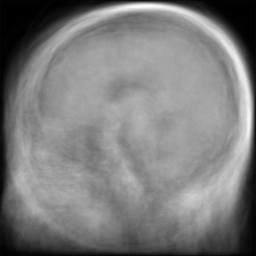

In [ ]:
print("Label 2:")
print("Number of Images: ", labels_df.value_counts()[2])
print("Percent of Images: ", round((labels_df.value_counts()[2] / len(labels_df))*100,1))
array_to_img(label_2_avg)

In [ ]:
label_2_y_train = y_train[labels == 2]
label_2_df = pd.DataFrame(label_2_y_train)
label_2_df.value_counts(sort=False)

1     20
2     34
3     41
4    100
dtype: int64

Label 5:
Number of Images:  167
Percent of Images:  15.9


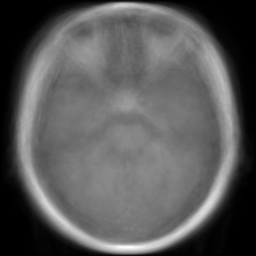

In [ ]:
print("Label 5:")
print("Number of Images: ", labels_df.value_counts()[5])
print("Percent of Images: ", round((labels_df.value_counts()[5] / len(labels_df))*100,1))
array_to_img(label_5_avg)

In [ ]:
label_5_y_train = y_train[labels == 5]
label_5_df = pd.DataFrame(label_5_y_train)
label_5_df.value_counts(sort=False)

1    16
2    42
3    35
4    74
dtype: int64

Label 4:
Number of Images:  148
Percent of Images:  14.1


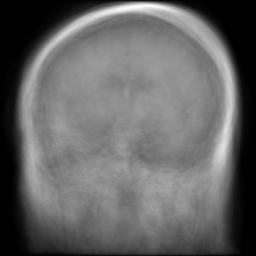

In [ ]:
print("Label 4:")
print("Number of Images: ", labels_df.value_counts()[4])
print("Percent of Images: ", round((labels_df.value_counts()[4] / len(labels_df))*100,1))
array_to_img(label_4_avg)

In [ ]:
label_4_y_train = y_train[labels == 4]
label_4_df = pd.DataFrame(label_4_y_train)
label_4_df.value_counts(sort=False)

1     6
2    52
3    46
4    44
dtype: int64

Label 9:
Number of Images:  95
Percent of Images:  9.0


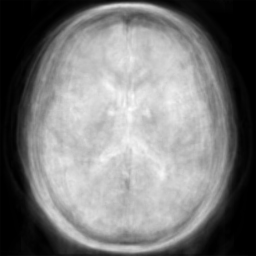

In [ ]:
print("Label 9:")
print("Number of Images: ", labels_df.value_counts()[9])
print("Percent of Images: ", round((labels_df.value_counts()[9] / len(labels_df))*100,1))
array_to_img(label_9_avg)

In [ ]:
label_9_y_train = y_train[labels == 9]
label_9_df = pd.DataFrame(label_9_y_train)
label_9_df.value_counts(sort=False)

1    68
2     7
3    19
4     1
dtype: int64

**Average Images, Outliers**

Label 1:
Number of Images:  13
Percent of Images:  1.2


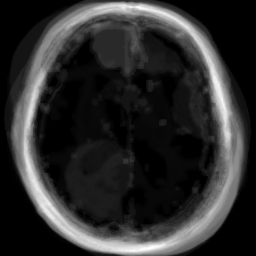

In [ ]:
print("Label 1:")
print("Number of Images: ", labels_df.value_counts()[1])
print("Percent of Images: ", round((labels_df.value_counts()[1] / len(labels_df))*100,1))
array_to_img(label_1_avg)

In [ ]:
label_1_y_train = y_train[labels == 1]
label_1_df = pd.DataFrame(label_1_y_train)
label_1_df.value_counts(sort=False)

1    9
3    4
dtype: int64

Label 6:
Number of Images:  26
Percent of Images:  2.5


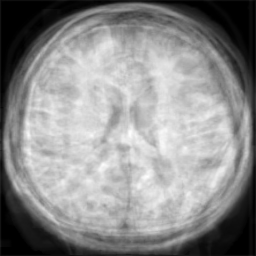

In [ ]:
print("Label 6:")
print("Number of Images: ", labels_df.value_counts()[6])
print("Percent of Images: ", round((labels_df.value_counts()[6] / len(labels_df))*100,1))
array_to_img(label_6_avg)

In [ ]:
label_6_y_train = y_train[labels == 6]
label_6_df = pd.DataFrame(label_6_y_train)
label_6_df.value_counts(sort=False)

1    22
3     4
dtype: int64

Label 3:
Number of Images:  29
Percent of Images:  2.8


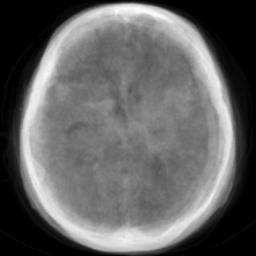

In [ ]:
print("Label 3:")
print("Number of Images: ", labels_df.value_counts()[3])
print("Percent of Images: ", round((labels_df.value_counts()[3] / len(labels_df))*100,1))
array_to_img(label_3_avg)

In [ ]:
label_3_y_train = y_train[labels == 3]
label_3_df = pd.DataFrame(label_3_y_train)
label_3_df.value_counts(sort=False)

1    18
2     1
3    10
dtype: int64